# Загрузка данных
Для этого урока мы используем данные из каталога DATA. После того, как вы загрузили файл Data.zip в свой домашний каталог, вы можете разархивировать файл, например, 7Zip (в Windows).
Папка данных включает в себя Shapefile под названием DAMSELFISH_distribution.shp (и связанные с ним файлы).

# Чтение файла Shapefile
Пространственные данные можно легко читать с помощью геоданных, используя -функцию gpd.from_file() :

In [2]:
import geopandas as gpd

In [4]:
fp = r"C:\Users\s.shchus\Documents\GitHub\Automatic_GIS\DATA\DAMSELFISH_distributions.shp"

In [5]:
data = gpd.read_file(fp)

In [6]:
type (data)

geopandas.geodataframe.GeoDataFrame

Okey, поэтому из вышеизложенного мы видим, что наш data-variable является GeoDataFrame . GeoDataFrame расширяет функциональные возможности pandas.DataFrame таким образом, что можно использовать и обрабатывать пространственные данные в пандах (отсюда и названия геоданных). GeoDataFrame имеет некоторые специальные функции и функции, которые полезны в ГИС.

Давайте посмотрим на наши данные и напечатаем первые 5 строк, используя
head() -функция печатает первые 5 строк по умолчанию

In [8]:
data.head()

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,POLYGON ((-115.6437454219999 29.71392059300007...
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.589950704 21.89339825500002, -1..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.159618439 19.01535626700007, -1..."
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,POLYGON ((-80.86500229899997 -0.77894492099994...
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,POLYGON ((-67.33922225599997 -55.6761029239999...


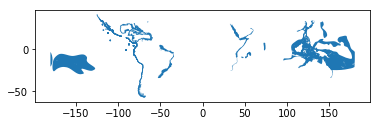

In [10]:
data.plot();

In [11]:
out = r"C:\Users\s.shchus\Documents\GitHub\Automatic_GIS\DATA\DAMSELFISH_distributions_out.shp"

In [12]:
selection = data [0:50]
selection.to_file (out)

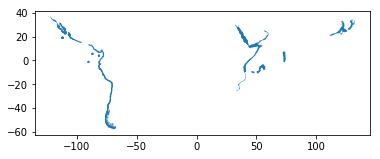

In [16]:
y = r"C:\Users\s.shchus\Documents\GitHub\Automatic_GIS\DATA\DAMSELFISH_distributions_out.shp"
y = gpd.read_file(y)

y.plot();

# Геометрия в геопандах
Geopandas использует геометрические объекты Shapely. Геометрия хранится в столбце с именем geometry, который является именем столбца по умолчанию для хранения геометрической информации в геоданном.

Давайте напечатаем первые 5 строк геометрии столбца:

In [17]:
data ['geometry'].head()

0    POLYGON ((-115.6437454219999 29.71392059300007...
1    POLYGON ((-105.589950704 21.89339825500002, -1...
2    POLYGON ((-111.159618439 19.01535626700007, -1...
3    POLYGON ((-80.86500229899997 -0.77894492099994...
4    POLYGON ((-67.33922225599997 -55.6761029239999...
Name: geometry, dtype: object

In [18]:
selection = data [0:5]

In [24]:
for index, row in selection.iterrows():
    poly_area = row ['geometry'].area
    print ("Polygon area at index {0} is: {1:.3f}".format(index, poly_area))

Polygon area at index 0 is: 19.396
Polygon area at index 1 is: 6.146
Polygon area at index 2 is: 2.697
Polygon area at index 3 is: 87.461
Polygon area at index 4 is: 0.001


In [26]:
data ['area'] = data.area
data ['area'].head()

0    19.396254
1     6.145902
2     2.697207
3    87.460621
4     0.000918
Name: area, dtype: float64

Okey, поэтому мы можем видеть, что область нашего первого многоугольника, по-видимому, составляет 19.39 и 6.14 для второго многоугольника. Они соответствуют тем, которые мы видели на предыдущем шаге при повторении строк, следовательно, все работает так, как должно. Давайте проверим, что такое min и max этих областей, используя знакомые функции из наших предыдущих сокращений Pandas.

In [28]:
max_area = data ['area'].max()

mean_area = data ['area'].mean()

print ("Max area: %s\nMean area: %s" % (round (max_area, 2), round (mean_area, 2)))

Max area: 1493.2
Mean area: 19.96


# Создание геометрий в GeoDataFrame
Поскольку геоданные используют преимущества геометрических объектов Shapely, можно создать Shapefile с нуля, передав геометрические объекты Shapely в GeoDataFrame. Это полезно, поскольку упрощает преобразование, например, текстового файла, который содержит координаты в Shapefile.

Давайте создадим пустую GeoDataFrame.

In [32]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona

newdata = gpd.GeoDataFrame()

In [34]:
print (newdata)

Empty GeoDataFrame
Columns: []
Index: []


GeoDataFrame пуст, поскольку мы не помещаем какие-либо данные внутри.

Давайте создадим новый столбец, geometry который будет содержать наши объекты Shapely:

In [35]:
newdata ['geometry'] = None

print (newdata)

Empty GeoDataFrame
Columns: [geometry]
Index: []


Теперь у нас есть геометрия в нашем GeoDataFrame, но у нас пока нет данных.

Давайте создадим Shapely Polygon, воссоздающий квадрат сената Хельсинки, который мы можем вставить в наш GeoDataFrame:

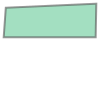

In [36]:
coordinates = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon (coordinates)
poly

Okey, так что теперь у нас есть подходящий объект Polygon.

Вставим многоугольник в наш столбец «geometry» в нашем GeoDataFrame:

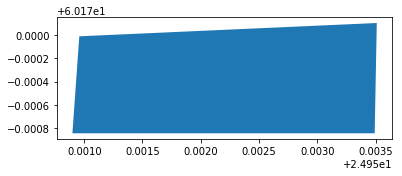

In [40]:
newdata.loc [0, 'geometry'] = poly

newdata.plot();

Теперь у нас есть GeoDataFrame с Polygon, который мы можем экспортировать в Shapefile.

Давайте добавим еще один столбец в наш GeoDataFrame Locationс текстом Senaatintori .

In [42]:
newdata.loc [0, 'Location'] = 'Senaatintori'
newdata

,geometry,Location
0,"POLYGON ((24.950899 60.169158, 24.953492 60.16...",Senaatintori
